In [1]:
#importing all ther required libraries/ packeages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading from the csv files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
result = pd.read_csv('sample_submission.csv')

## Exploring & engineering the  Data Set

In [3]:
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [4]:
train.shape

(245725, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [8]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [11]:
columns=[ 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
        'Credit_Product', 'Is_Active','Is_Lead']

for col in tqdm(columns):
    print("Value counts of",col,"is :")
    print(train[col].value_counts())
    print()
    print("Unique values of",col,"is :",train[col].unique()) 
    print()

 43%|████▎     | 3/7 [00:00<00:00, 20.69it/s]

Value counts of Gender is :
Male      134197
Female    111528
Name: Gender, dtype: int64

Unique values of Gender is : ['Female' 'Male']

Value counts of Region_Code is :
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

Unique values of Region_Code is : ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' '

100%|██████████| 7/7 [00:00<00:00, 27.45it/s]

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

Unique values of Credit_Product is : ['No' nan 'Yes']

Value counts of Is_Active is :
No     150290
Yes     95435
Name: Is_Active, dtype: int64

Unique values of Is_Active is : ['No' 'Yes']

Value counts of Is_Lead is :
0    187437
1     58288
Name: Is_Lead, dtype: int64

Unique values of Is_Lead is : [0 1]



In [12]:
train.fillna("missing",inplace=True)
test.fillna("missing",inplace=True)

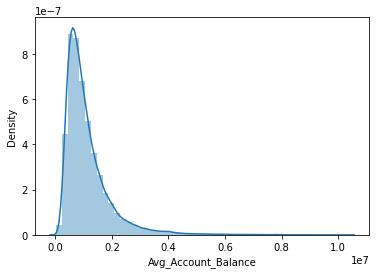

In [13]:
sns.distplot(train['Avg_Account_Balance'])
plt.show()

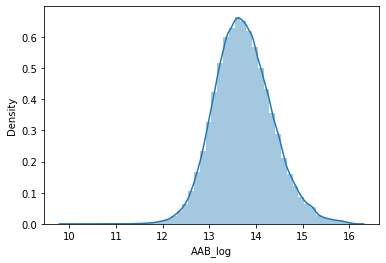

In [14]:
train['AAB_log'] = np.log(train['Avg_Account_Balance'])
sns.distplot(train['AAB_log'])
plt.show()

<AxesSubplot:>

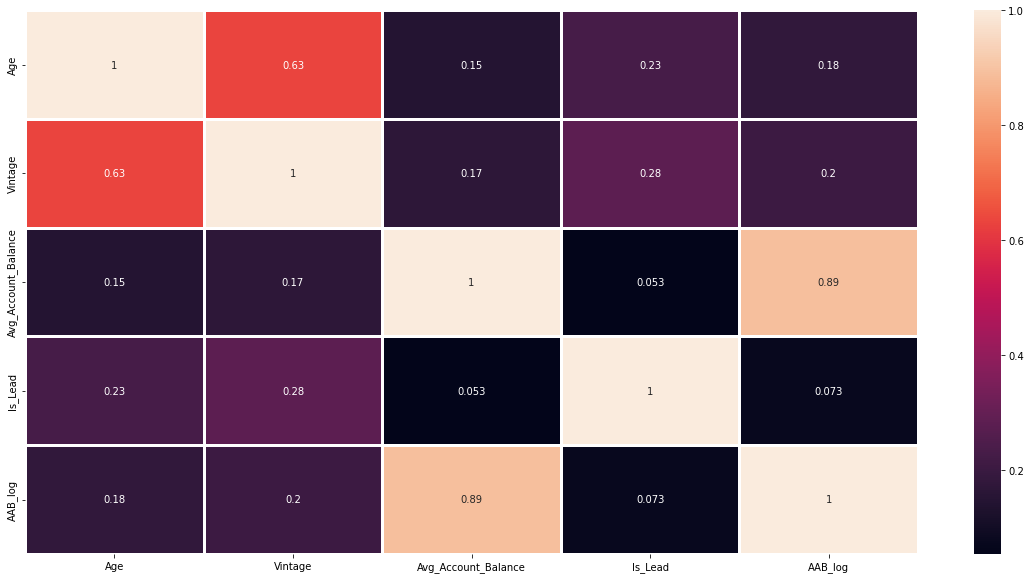

In [15]:
fig= plt.figure(figsize=(20,10))
ax= plt.axes()

sns.heatmap(data=train.corr(), annot=True,linewidths=3)

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import optuna
from sklearn.model_selection import cross_val_score,train_test_split , StratifiedKFold
from sklearn.metrics import roc_auc_score , f1_score , confusion_matrix , classification_report

In [17]:
label_encode=LabelEncoder()
columns=['Gender', 'Is_Active','Occupation', 'Channel_Code','Credit_Product',"Region_Code"]
train[columns]=train[columns].apply(label_encode.fit_transform)
test[columns]=test[columns].apply(label_encode.fit_transform)
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,AAB_log
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0,13.860193
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0,13.274205
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0,14.210464
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0,13.061453
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0,13.695360


In [18]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,4,1,0,25,1,742366,0
1,CCMEWNKY,1,43,18,1,1,49,2,925537,0
2,VK3KGA9M,1,31,20,2,0,14,0,215949,0
3,TT8RPZVC,1,29,22,1,0,33,0,868070,0
4,SHQZEYTZ,0,29,20,1,0,19,0,657087,0


In [19]:
# ss=StandardScaler()
# columns=['Age','Vintage','Avg_Account_Balance']
# train[columns]=ss.fit_transform(train[columns])
# test[columns]=ss.fit_transform(test[columns])
# train.head()

<AxesSubplot:>

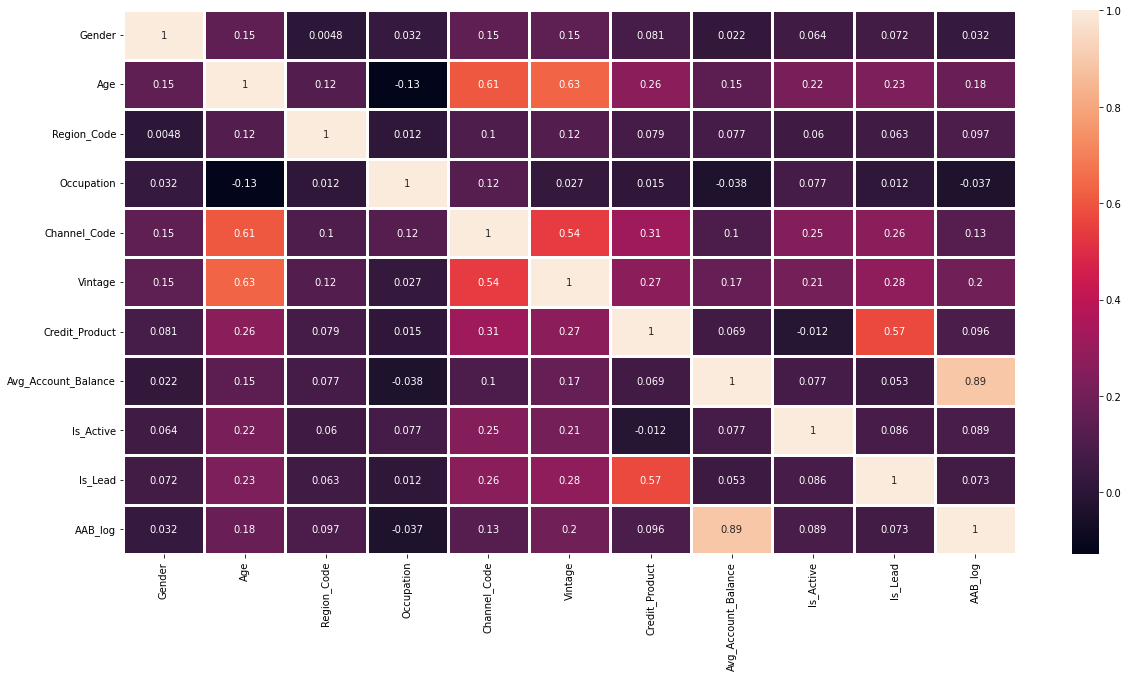

In [20]:
fig= plt.figure(figsize=(20,10))
ax= plt.axes()

sns.heatmap(data=train.corr(), annot=True,linewidths=3)

In [21]:
selected_columns = ['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active']

In [22]:
X = train[selected_columns]
y = train.Is_Lead

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

In [24]:
y_train.value_counts()


0    131206
1     40801
Name: Is_Lead, dtype: int64

In [25]:
y_test.value_counts()

0    56231
1    17487
Name: Is_Lead, dtype: int64

In [26]:
import lightgbm as lgb

In [27]:
def objective_lgbm(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 500)
    max_depth = int(trial.suggest_int('max_depth', 2, 50))
    learning_rate=trial.suggest_loguniform('learning_rate',0.001,1)
    colsample_bytree=trial.suggest_loguniform("colsample_bytree",0.1, 1)
    num_leaves=trial.suggest_int('num_leaves',10,300)
    reg_alpha= trial.suggest_loguniform('reg_alpha',0.1,10)
    reg_lambda= trial.suggest_loguniform('reg_lambda',0.1,10)
    min_split_gain=trial.suggest_loguniform('min_split_gain',0.1,1)
    subsample=trial.suggest_loguniform('subsample',0.1,1)    
    clf = lgb.LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth,
                            learning_rate=learning_rate,colsample_bytree=colsample_bytree,
                            num_leaves=num_leaves,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                            min_split_gain=min_split_gain,subsample=subsample)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=5,scoring='roc_auc').mean()

In [28]:
study_lgbm= optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=15)

[I 2021-10-11 17:24:16,826] A new study created in memory with name: LGBM
[I 2021-10-11 17:24:20,851] Trial 0 finished with value: 0.8731030746066452 and parameters: {'n_estimators': 106, 'max_depth': 34, 'learning_rate': 0.40584689623242276, 'colsample_bytree': 0.3960379803558728, 'num_leaves': 46, 'reg_alpha': 8.233796006113456, 'reg_lambda': 2.6936063890958293, 'min_split_gain': 0.8005492080625192, 'subsample': 0.15970154587868948}. Best is trial 0 with value: 0.8731030746066452.
[I 2021-10-11 17:24:26,509] Trial 1 finished with value: 0.8657864793875707 and parameters: {'n_estimators': 202, 'max_depth': 26, 'learning_rate': 0.13120222999996625, 'colsample_bytree': 0.14274937618923728, 'num_leaves': 111, 'reg_alpha': 0.2832676785741923, 'reg_lambda': 1.7769385465273286, 'min_split_gain': 0.1265419886497494, 'subsample': 0.2549181719366486}. Best is trial 0 with value: 0.8731030746066452.
[I 2021-10-11 17:24:48,354] Trial 2 finished with value: 0.8563660028671881 and parameters: {'n_

In [29]:
trial_lgbm= study_lgbm.best_trial
print("params ",trial_lgbm.params)
print("Accuracy",trial_lgbm.value)

params  {'n_estimators': 367, 'max_depth': 25, 'learning_rate': 0.0666177457284338, 'colsample_bytree': 0.4166706133565985, 'num_leaves': 24, 'reg_alpha': 0.4665365066456159, 'reg_lambda': 0.33813745330917744, 'min_split_gain': 0.11803153764393029, 'subsample': 0.11386885647557608}
Accuracy 0.8733923201530652


In [32]:
model_lgbm=lgb.LGBMClassifier(**trial_lgbm.params)
model_lgbm.fit(x_train,y_train,eval_metric="auc",eval_set=[(x_test,y_test)],early_stopping_rounds=100,verbose=400)

LGBMClassifier(colsample_bytree=0.4166706133565985,
               learning_rate=0.0666177457284338, max_depth=25,
               min_split_gain=0.11803153764393029, n_estimators=367,
               num_leaves=24, reg_alpha=0.4665365066456159,
               reg_lambda=0.33813745330917744, subsample=0.11386885647557608)

In [33]:
pred_lgbm=model_lgbm.predict_proba(x_test)[:,1]

In [34]:
print(roc_auc_score(y_test,pred_lgbm))

0.8726255435005862


<AxesSubplot:>

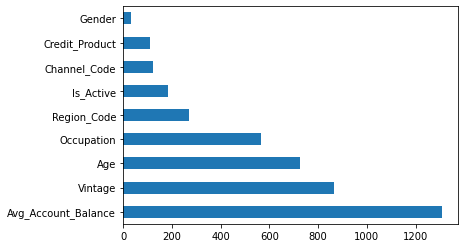

In [35]:
(pd.Series(model_lgbm.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))  

# Predicting from the test dataset. 
## To test new data set import it to test variable from cell 2

In [36]:
preds = model_lgbm.predict_proba(test[selected_columns])[:, 1]

In [37]:
result = pd.DataFrame()
result['ID'] = test.ID
result['Is_Lead'] = preds

In [38]:
result

,ID,Is_Lead
0,VBENBARO,0.055408
1,CCMEWNKY,0.823646
2,VK3KGA9M,0.052790
3,TT8RPZVC,0.023362
4,SHQZEYTZ,0.022197
...,...,...
105307,DBENJOYI,0.980371
105308,CWQ72DWS,0.574002
105309,HDESC8GU,0.092792
105310,2PW4SFCA,0.221247


In [39]:
result.to_csv("resutl6_1.csv",index=False)